In [1]:
import os
import numpy as np
from matplotlib import pyplot

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive



Este código carga y preprocesa un archivo de texto (BOSTON ARREGLADO.txt) para convertirlo en un conjunto de datos utilizables en NumPy.

In [6]:
# Leer datos
import numpy as np

# Definir una función que reemplace los puntos por nada
def preprocess_data(line):
    return line.replace('.', '').replace(',', '.')

# Cargar el dataset desde el archivo, procesando cada línea antes de la conversión
with open('/content/gdrive/MyDrive/IA/datasets/BOSTON ARREGLADO.txt', 'r') as file:
    # Leer el archivo y aplicar la función de preprocesamiento a cada línea
    data = np.loadtxt((preprocess_data(line) for line in file), delimiter='\t')

# Asignar las características a X y la variable objetivo a y
X, y = data[:, :-1], data[:, -1]

# Número de ejemplos
m = y.size

# Verifica las dimensiones
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)


Dimensiones de X: (506, 13)
Dimensiones de y: (506,)


In [7]:
X.shape

(506, 13)

En el siguiente codigo se estandariza las características de X, de manera que cada característica tenga una media de 0 y una desviación estándar de 1. Esto puede ayudar a mejorar el rendimiento y la convergencia de los algoritmos de machine learning que son sensibles a la escala de las características.

En el siguiente codigo veremos que se normaliza el conjunto de datos X, imprime los datos originales, y luego muestra los valores de la media y desviación estándar de cada característica, así como el conjunto de datos después de la normalización. Esto te permite verificar cómo se han transformado los datos y comprobar que la normalización se ha realizado correctamente.

In [8]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


Aqui veremos que se normaliza el conjunto de datos X utilizando la función normalizarCaracteristicas, la cual ajusta cada característica para que tenga una media de 0 y una desviación estándar de 1. Primero, llama a la función para obtener X_norm, mu (la media de cada característica), y sigma (la desviación estándar de cada característica). Luego, imprime el conjunto de datos original X, las medias y desviaciones estándar calculadas, y finalmente, el conjunto de datos normalizado X_norm. Esto permite comparar los datos antes y después de la normalización y verificar los resultados de los cálculos de media y desviación estándar.

In [9]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[  632.  1800.  2310. ...  1530. 39690.   498.]
 [ 2731.     0.  7070. ...  1780. 39690.   914.]
 [ 2729.     0.  7070. ...  1780. 39283.   403.]
 ...
 [ 6076.     0. 11930. ...  2100. 39690.   564.]
 [10959.     0. 11930. ...  2100. 39345.   648.]
 [ 4741.     0. 11930. ...  2100. 39690.   788.]]
Media calculada: [3.61352356e+05 1.13636364e+03 1.11367787e+04 6.91699605e-02
 5.54695059e+03 6.28463439e+04 6.85749012e+03 3.79504269e+04
 9.54940711e+00 4.08237154e+03 1.84555336e+03 3.56674032e+04
 1.26530632e+03]
Desviación estandar calculada: [8.59304135e+05 2.32993957e+03 6.85357058e+03 2.53742935e-01
 1.15763115e+03 7.01922514e+03 2.81210326e+03 2.10362836e+04
 8.69865112e+00 1.68370495e+03 2.16280519e+02 9.12046075e+03
 7.13400164e+02]
[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0


La función graficarDatos crea un gráfico de dispersión utilizando la biblioteca pyplot de Matplotlib. Toma cuatro parámetros: x y y para las coordenadas de los puntos, y xlabel y ylabel para las etiquetas de los ejes X e Y, respectivamente. Dentro de la función, se crea una nueva figura (fig) y se plotean los puntos de datos (x, y) en el gráfico con marcadores rojos ('ro'). Luego, se establecen las etiquetas de los ejes X e Y usando pyplot.xlabel y pyplot.ylabel. La función permite visualizar la relación entre x e y en un gráfico de dispersión básico.

In [10]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)


posteriormente utilizamos la función graficarDatos para generar gráficos que muestran la relación entre diferentes características normalizadas (X_norm) y la variable objetivo (y). Primero, grafica la primera característica normalizada (X_norm[:, 0], correspondiente a crim) frente a y, y luego grafica la segunda característica normalizada (X_norm[:, 1], correspondiente a zn) frente a y. Finalmente, crea un gráfico de dispersión que muestra la relación entre las dos primeras características normalizadas (X_norm[:, 0] y X_norm[:, 1]), con etiquetas de los ejes X e Y correspondientes a las características crim y zn, respectivamente. Cada gráfico ayuda a visualizar cómo se relacionan las características normalizadas entre sí y con la variable objetivo.

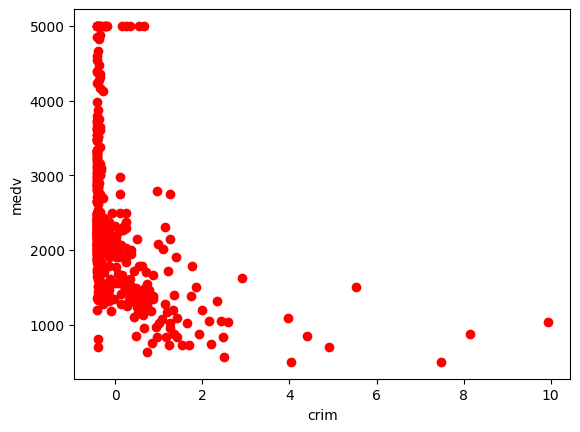

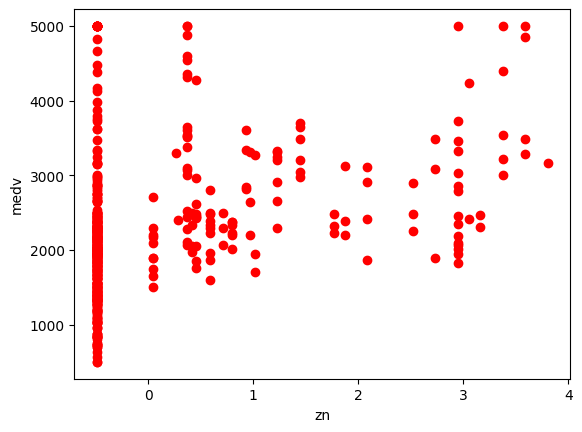

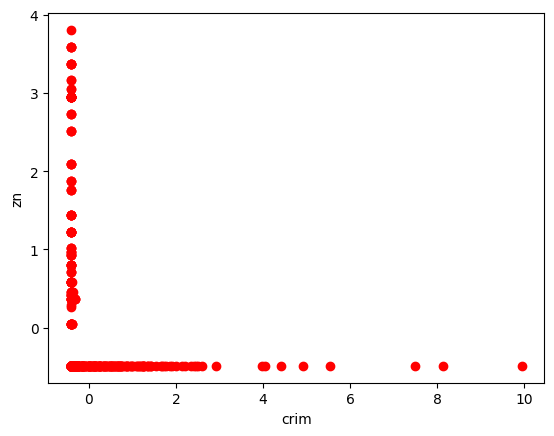

In [30]:
xlabel1 = "crim"
xlabel2 = "zn"
ylabel1 = "medv"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)


a continuacion el conjunto de datos X_norm para la regresión lineal añadiendo una columna de unos al principio de la matriz X_norm. La matriz X_norm ya contiene las características normalizadas del conjunto de datos, y al concatenar una columna de unos (np.ones((m, 1))) con X_norm, se añade un término de sesgo (o intercepto) a cada ejemplo. Esta columna de unos es necesaria para incluir el término de sesgo en el modelo de regresión lineal, permitiendo que el modelo ajuste el intercepto correctamente. El resultado, X_ready, tiene una columna adicional en la primera posición, y la concatenación se realiza a lo largo del eje de las columnas (axis=1).

In [31]:

#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape

La función calcularCosto calcula el costo de la función de pérdida para un modelo de regresión lineal dado un conjunto de datos X, las etiquetas y, y los parámetros theta. Primero, calcula la hipótesis del modelo h mediante el producto punto entre X y theta. Luego, calcula el costo J como el promedio del error cuadrático entre las predicciones h y las etiquetas reales y, dividido por 2. El costo J mide la discrepancia entre las predicciones del modelo y los valores reales, y se usa para evaluar la calidad del ajuste del modelo.

In [32]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

aqui apreciaremos como se ajusta el conjunto de datos X_ready añadiendo una columna adicional de unos para el término de sesgo, asegurando que theta tenga el tamaño adecuado para 15 parámetros. Inicializa theta con valores de 0.1 para todos los elementos. Luego, define la función calcularCosto, que calcula el costo de la función de pérdida de regresión lineal como el promedio del error cuadrático entre las predicciones del modelo (h) y los valores reales (y), dividido por 2. Finalmente, usa esta función para calcular y mostrar el costo JJ con los valores de theta iniciales.

In [17]:
import numpy as np

# Agregar una columna de unos a X_ready para el término de sesgo
X_ready = np.concatenate([np.ones((X_ready.shape[0], 1)), X_ready], axis=1)

# Inicializar theta con el tamaño adecuado (debe tener 15 elementos si X_ready tiene 14 características)
theta = np.array([0.1] * X_ready.shape[1])

# Función para calcular el costo
def calcularCosto(X, y, theta):
    m = y.size
    h = np.dot(X, theta)  # Calcula las predicciones
    J = (1/(2 * m)) * np.sum(np.square(h - y))  # Calcula el costo
    return J

# Calcular el costo con el theta dado
JJ = calcularCosto(X_ready, y, theta)
print(f"Con theta: {theta} se obtiene un costo de: {JJ}")

Con theta: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1] se obtiene un costo de: 2960238.596409706


La función calcularDescensoGradiente implementa el algoritmo de descenso por gradiente para optimizar los parámetros theta en un modelo de regresión lineal. Inicializa una copia de theta y una lista vacía J_historico para almacenar el costo en cada iteración. En cada una de las numero_iteraciones, actualiza theta ajustando los parámetros en la dirección opuesta al gradiente del costo, multiplicado por la tasa de aprendizaje alpha. Luego, calcula y guarda el costo actualizado usando la función calcularCosto. Finalmente, devuelve los parámetros optimizados theta y la lista J_historico con el historial del costo.

In [18]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Los valores de theta calculados son: [ 751.09354414  751.09354414  751.09354414  -78.09382527   81.1728303
  -27.3183738    74.25878968 -157.64392333  288.97216073  -10.35217846
 -274.17684355  145.94911487  -88.29790798 -195.2070443    87.2276731
 -364.25703171]
Con un costo de: 110823.64651548983


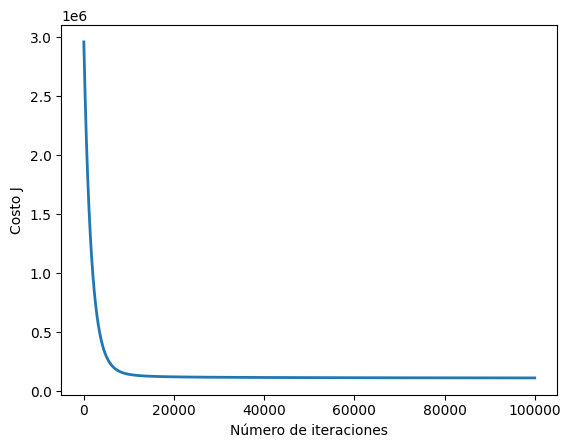

In [20]:
theta = np.zeros(X_ready.shape[1])

# Parámetros para el descenso de gradiente
num_ite = 100000
alpha = 0.0001

def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
    m = y.size
    J_historico = []

    for i in range(numero_iteraciones):
        # Actualización de theta utilizando descenso de gradiente
        theta = theta - (alpha / m) * np.dot(X.T, np.dot(X, theta) - y)
        J_historico.append(calcularCosto(X, y, theta))

    return theta, J_historico

def calcularCosto(X, y, theta):
    m = y.size
    h = np.dot(X, theta)  # Calcula las predicciones
    J = (1/(2 * m)) * np.sum(np.square(h - y))  # Calcula el costo
    return J

# Ejecución del descenso de gradiente
theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)

print(f"Los valores de theta calculados son: {theta}")
print(f"Con un costo de: {J_historico[-1]}")

# Graficar la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.show()


aqui se genera gráficos para visualizar la relación entre características y predicciones en un modelo de regresión lineal. Primero, llama a graficarDatos para crear un gráfico de dispersión de las dos primeras características normalizadas (X_ready[:, 1] y X_ready[:, 2]) contra una característica de referencia. Luego, superpone una línea de regresión lineal en el gráfico, mostrando las predicciones del modelo (np.dot(X_ready, theta)) en función de la primera característica (X_ready[:, 1]). Finalmente, agrega una leyenda para diferenciar entre los datos de entrenamiento y la línea de regresión lineal en el gráfico.

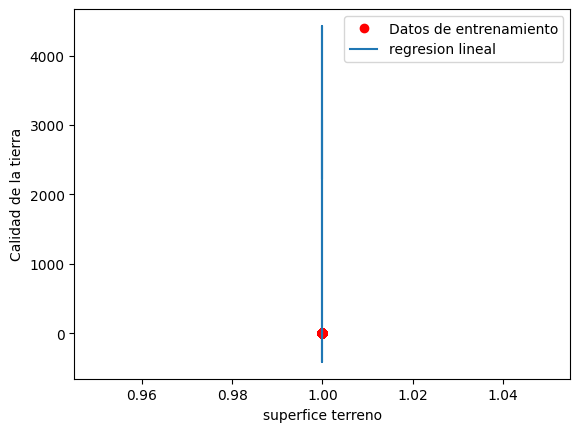

In [21]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

Este código crea un vector X_input para realizar una predicción, que incluye un término de sesgo (1) seguido de valores de entrada (2305 para la primera característica y 4 para la segunda), y ceros para el resto de las características que no se usan. Luego, calcula la predicción y_pred multiplicando X_input por theta usando el producto punto, y muestra el resultado de la predicción.

In [23]:
# 2300,4,449900
X_input = np.array([1, 2305, 4] + [0] * (len(theta) - 3))

# Realizar la predicción
y_pred = np.dot(X_input, theta)
print(y_pred)

1735026.0869560842


In [24]:
#Utilizando la ecuacion de la norma


La función calcularThethaEcuacionNormal calcula los parámetros óptimos theta para un modelo de regresión lineal utilizando la ecuación normal. Primero, inicializa theta como un vector de ceros con la misma dimensión que el número de características en X. Luego, usa la fórmula de la ecuación normal para calcular theta: theta = (X^T X)^-1 X^T y. Aquí, X^T es la transpuesta de X, X^T X es el producto punto de X transpuesta y X, y np.linalg.inv calcula la inversa de esta matriz. Finalmente, el producto de esta inversa con X^T y y da los valores óptimos de theta, que son devueltos por la función.

In [25]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

se añade una columna de unos al inicio del conjunto de datos X para incluir el término de sesgo en el modelo de regresión lineal, creando la matriz X_ren. La concatenación se realiza a lo largo del eje de las columnas (axis=1), lo que resulta en una matriz con una columna adicional de unos al principio.

In [26]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

Este código calcula los parámetros óptimos theta para el modelo de regresión lineal usando la ecuación normal con el conjunto de datos X_ren (que incluye el término de sesgo) y las etiquetas y. Luego, imprime los valores de theta calculados.

In [27]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [ 3.64594884e+03 -1.08011358e-04  4.64204584e-02  2.05586264e-03
  2.68673382e+02 -1.77666112e-01  3.80986521e-02  6.92224640e-04
 -1.47556685e-02  3.06049479e+01 -1.23345939e-01 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]



por ultimo se crea un vector X_array que incluye el término de sesgo (1), los valores de entrada (2305 para la superficie y 4 para los dormitorios), y ceros adicionales para las características restantes. Luego, realiza una predicción del precio utilizando el producto punto de X_array y theta, y muestra el resultado formateado como el precio predicho para la casa.

In [29]:
X_array = [1, 2305, 4] + [0] * (len(theta) - 3)

# Realizar la predicción
price = np.dot(X_array, theta)

print('Precio predecido para una casa de superficie de 2305 sq-ft y 4 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Precio predecido para una casa de superficie de 2305 sq-ft y 4 dormitorios (usando la ecuación de la normal): $3646
